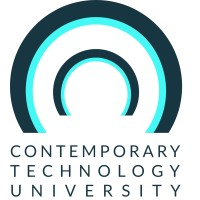

# Assignment 14 : Covid-19 Web Scraping to Determine the Number of Cases and Deaths Worldwide

### This exercise will scrape the web for COVID-19 data generated in real-time to determine the number of cases and deaths worldwide. Next, I will use the data to populate my database container in Docker and run DBeaver PostgreSQL queries. Finally, I will push my code to Git and GitHub for version control and collaboration.

## Submitted By:
### Gibson Opurum

### Instructor: Sergiy Shevchenko
### Date: March 12, 2022

# Part 1

In [1]:
# Import libraries.
import requests
from bs4 import BeautifulSoup
import texttable as tt

## Definition and Usage

* The requests module allows you to send HTTP requests using Python. The HTTP request returns a Response Object with all the response data (content, encoding, status, etc). Link https://bit.ly/3sVV04f

* Beautiful Soup is a Python library that is used for web scraping purposes to pull the data out of HTML and XML files. It creates a parse tree from page source code that can be used to extract data in a hierarchical and more readable manner. https://bit.ly/3IVmKvk

* Texttable is a python package written by Gerome Fournier, which can be used to produce simple formatted tables. The table produced can include a header with title for each column and separated from the first row with a line drawn using a user specified character. https://bit.ly/3J1lS8A

In [2]:
# Scrape data from the web address.
web_addrs = 'https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/'

In [3]:
# Get web_addrs Hypertext Markup Language (HTML)
page = requests.get(web_addrs)
soup = BeautifulSoup(page.text, 'html.parser')

In [4]:
# Web scraping for our data is the next step. Let's start by making a list to save the data before we scrape it.
data_list = []

### Let's use iter() function. 
### Iter() generates an object that can be iterated one element at a time. 
### These objects are helpful when used with loops such as for and while-loop.

In [5]:
# We'll use soup.find_all('td')) to scrape every element in the web_addrs table.
data_iterator = iter(soup.findAll('td')) # where data_iterator is the table's iterator.

In [6]:
# This iterator will keep looping until data is found.
while True:
    try:
        country = next(data_iterator).text
        number_of_cases = next(data_iterator).text
        deaths = next(data_iterator).text
        continent = next(data_iterator).text
 
        # Make careful to remove the commas from 'number of cases' and 'deaths,' and then convert them to int.
        data_list.append((
            country,
            int(number_of_cases.replace(',', '')),
            int(deaths.replace(',', '')),
            continent
        ))
 
    # When there are no more elements to iterate through, the StopIteration error is returned.
    except StopIteration:
        break

In [7]:
# Sort the COVID-19 data in data_list according to the number_of_cases.
data_list.sort(key = lambda row: row[1], reverse = True)

In [8]:
# Let's create a texttable object.
covid19_table = tt.Texttable()
 
# Begin by creating the headers with an empty row at the top.
covid19_table.add_rows([(None, None, None, None)] + data_list)
 
# The letters 'l', 'c,' and 'r' stand for left, centre, and right, respectively. 
# So we'll go with 'c' because that seems to be the best option for our table.
covid19_table.set_cols_align(('c', 'c', 'c', 'c')) 
covid19_table.header((' Country ', ' Number of Cases ', ' Deaths ', ' Continent '))
 
print(covid19_table.draw())

+---------------------------+-------------------+----------+-------------------+
|          Country          |  Number of Cases  |  Deaths  |     Continent     |
+===========================+===================+==========+===================+
|       United States       |     81075833      |  989992  |   North America   |
+---------------------------+-------------------+----------+-------------------+
|           India           |     42980067      |  515490  |       Asia        |
+---------------------------+-------------------+----------+-------------------+
|          Brazil           |     29194042      |  653588  |   South America   |
+---------------------------+-------------------+----------+-------------------+
|          France           |     23308880      |  139880  |      Europe       |
+---------------------------+-------------------+----------+-------------------+
|      United Kingdom       |     19373884      |  162482  |      Europe       |
+---------------------------

### Since I successfully scrapped COVID-19 data from the web, the next step is to use it to populate my database using PostgresSQL in Python and run some queries.

### I'll start by connecting to my Docker database container, then using its credentials to connect to PostgreSQL on DBeaver. The attachments below will clarify my connection to my container and Postgres relational database management system.

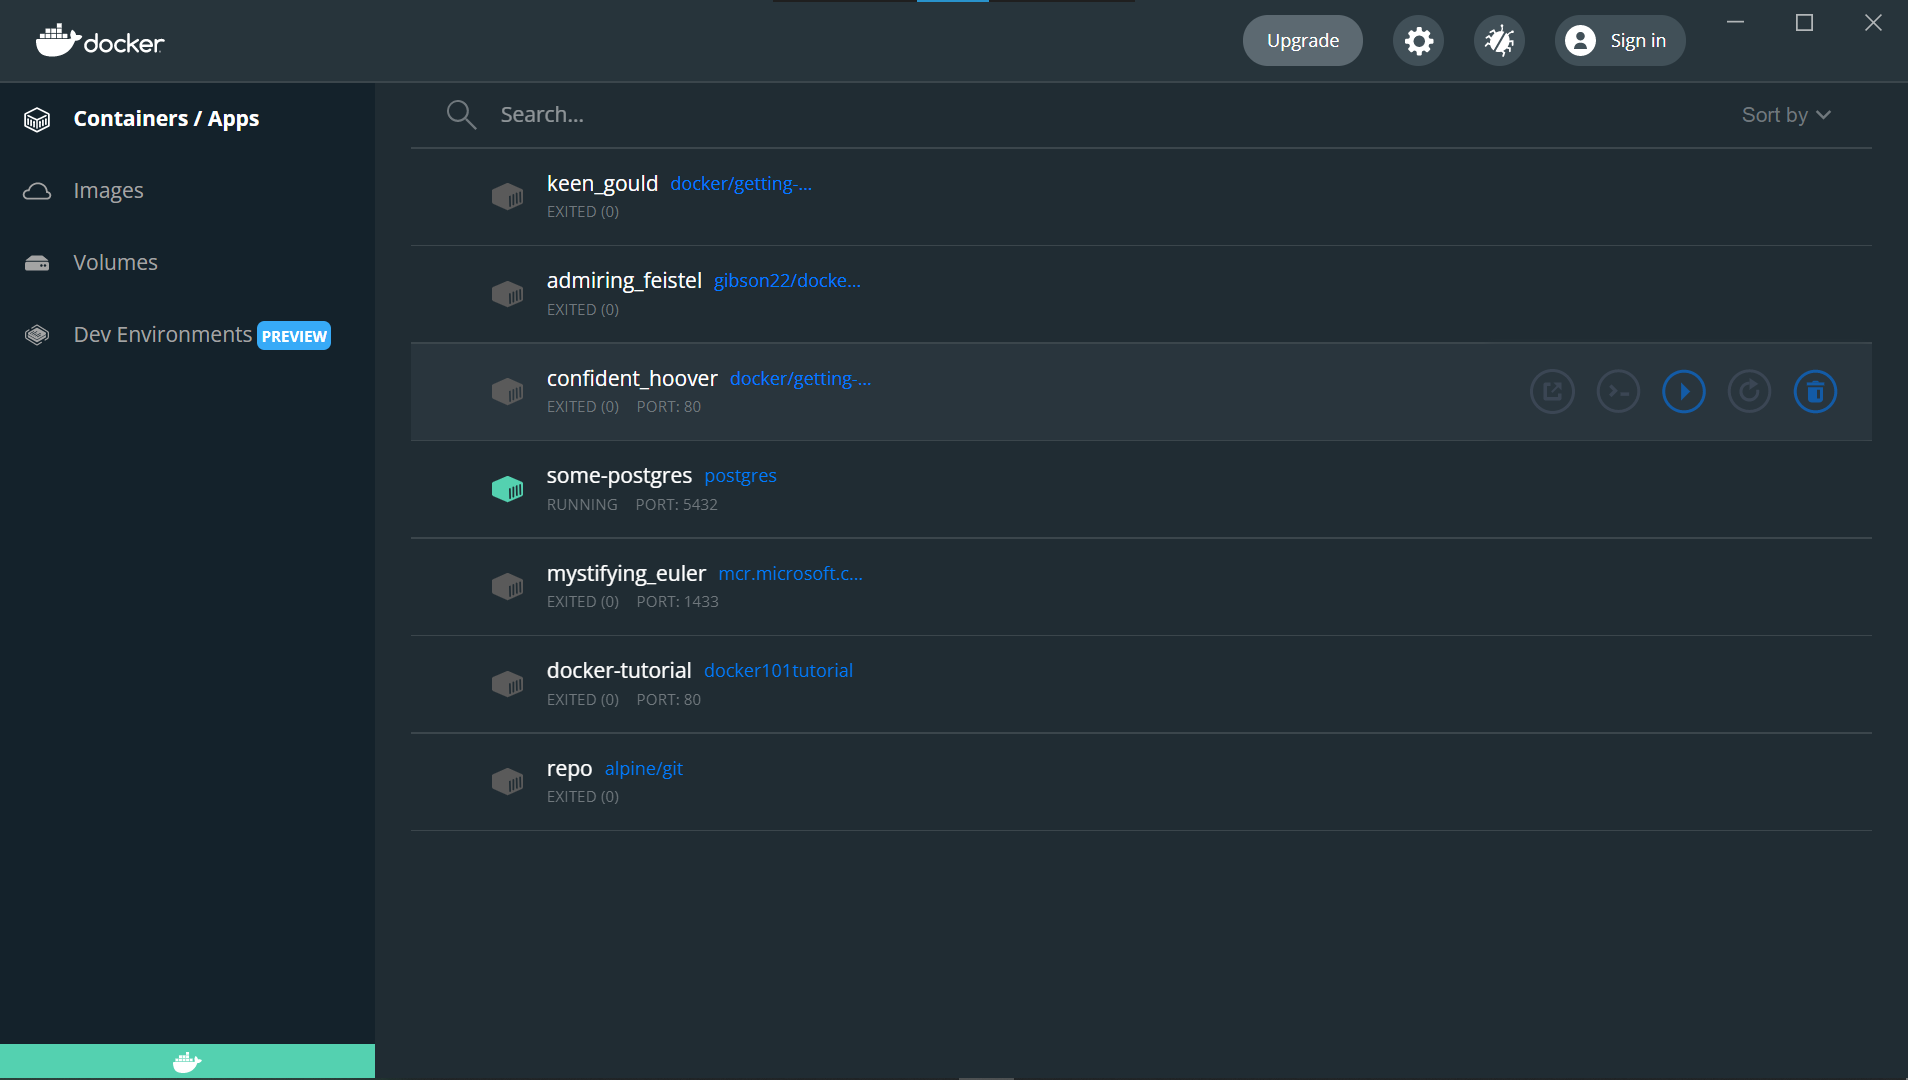

This image depicts my Docker container in operation. After creating this connection, I'll use my dockerized container credentials to start Postgres in Python, as shown in the code below.

# Part 2

### Connect to PostgreSQL from Python Using SQL in Python

* I'll need to install psycopg2 module like so: "pip install psycopg2" on my command line before writing a Python script to connect to my existing PostgreSQL database from earlier assignments. 
* However, I will not do so because I already installed it in earlier instances.

In [9]:
import psycopg2
import psycopg2.extras    #this module tells cursor to return a data from the database in the form of a dictionary.

# Identify the database connection credentials.
hostname = 'localhost'
database = 'postgres'
username = 'postgres'
pwd = 'mysecretpassword'
port_id = 5432

conn_var = None # Initial database connection variable set to none or say not running.

# Call the 'connect' function that is inside psycopg2 using a "with clause."
try:
    with psycopg2.connect(
                        host = hostname,
                        dbname = database,
                        user = username,
                        password = pwd,
                        port = port_id) as conn_var:


        # Create a cursor object to assist in performing any SQL query and to save the values returned by such operations.
        with conn_var.cursor(cursor_factory=psycopg2.extras.DictCursor) as cur_var:

        # I've successfully established a database connection and opened the cursor. Next, I'll create a database table and query it as shown in step 3 in the code above.

            cur_var.execute('DROP TABLE IF EXISTS covid19database')  # This line of code is important for populating my
            # database with more data without returning errors like saying a similar "input value" exists. So, what it will do is to
            # make sure that every time I execute the command, it will drop the table first, and then it will create
            # the table and then it will insert all the data that I want to insert without issues.

            # Step 3 create database table.
            my_table_var = ''' CREATE TABLE covid19database (
                                    id   int PRIMARY KEY,
                                    country varchar(30) NOT NULL,
                                    number_of_cases int,
                                    deaths int,
                                    continent varchar(20)) '''

            # Use cursor.execute method to run the my_table_var script.
            cur_var.execute(my_table_var)

            # Now I can add some of my scraped data in PostgreSQL.
            my_insert_script = 'INSERT INTO covid19database (id, country, number_of_cases, deaths, continent) VALUES (%s, %s, %s, %s, %s)'
            #where the %s are the placeholders to take my five variable data.
            insert_values = [(1, 'United States', 81064103, 989473, 'North America'), (2, 'India', 42980067, 515490, 'Asia'), (3, 'Brazil', 29194042, 653588, 'South America'), (4, 'France', 23234062, 139773, 'Europe'), (5, 'United Kingdom', 
            19373884, 162482, 'Europe')]
            for param in insert_values:
                cur_var.execute(my_insert_script, param)

            # Let's say I want to update database values and view the result in Python, I will do:
            update_script = 'UPDATE covid19database SET deaths = deaths + (deaths * 0.5)'
            cur_var.execute(update_script)

            # What if I want to delete a value from my database; I will say:
            delete_script = 'DELETE FROM covid19database WHERE country = %s'
            delete_record = ('India',)
            cur_var.execute(delete_script, delete_record)

            # Assuming I want to query my database in Python environment instead of DBeaver, and view the result:
            cur_var.execute('SELECT * FROM COVID19DATABASE')
            for param in cur_var.fetchall():
                print(param['country'], param['deaths'])

            # To commit the transaction so that it shows in my DBeaver PostgreSQL, I will call conn_var.commit mmethod.
            conn_var.commit()   #it tells the database to save any transaction that I do into my database.

            ###Notice now that I have created a PostgreSQL database in DBeaver using Python and Docker!###


except Exception as error:
    print(error)

finally:
    if cur_var is not None:   # If the database connection is open, the close command will not be executed.
        cur_var.close()
    if conn_var is not None:
        conn_var.close()

United States 1484210
Brazil 980382
France 209660
United Kingdom 243723


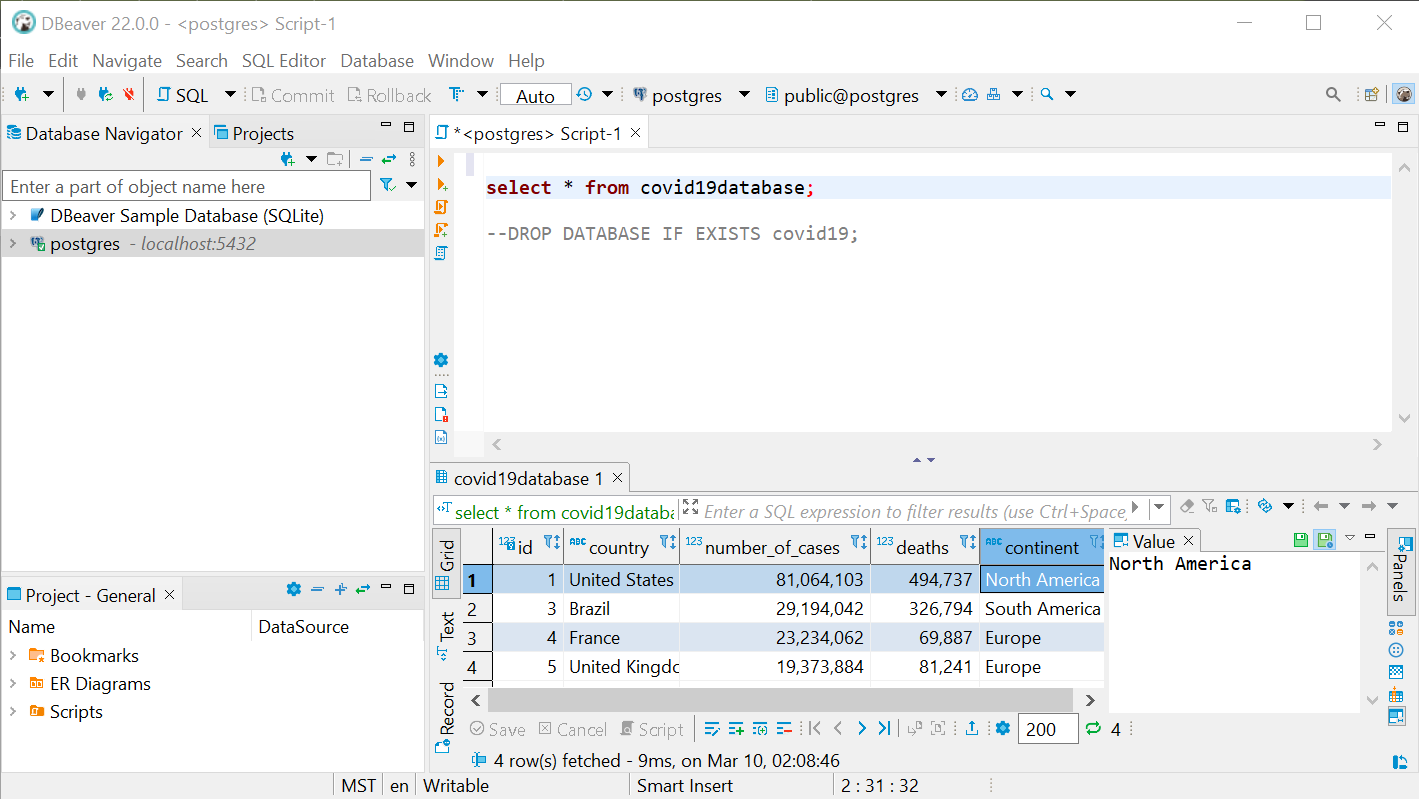

I successfully connected to Postgres using the code above and queried my database, as shown in this screenshot. As you can see, the result of my code is mirrored in this database as well. So, I can analyze the scraped COVID-19 data using this DBeaver PostgreSQL, or I can do it in Python. The result will be identical.

# Part 3

### Push code to GitHub using Git Bash or Microsoft VSCode

Now I'll use Git Bash or VSCode to initialize, stage, and commit my script to GitHub for version control, making it easier for my team to collaborate on this project and meet the project's needs.

## Conclusion

I have successfully created a table and inserted some records into it, and I have shown how to insert multiple records into a table. So, we can now input all of our scraped data into the PostgreSQL database with this Python script.

In addition, I've shown how to update the database, delete a record from my database, fetch the data from the database, and display it in a Python script.

On the other hand, I used a context manager to perform these operations. To use the context manager, I had to use the "with clause" when I was trying to create the database connection, and I also used the with clause when I tried to open the cursor.

There are a few advantages to using a with clause; the first advantage is that a with clause will close the cursor, so I don't need to write a code to close the cursor manually. As soon as my program execution exits the "with clause" of the cursor, it will close the cursor for me, so I don't need to mention the closing of the cursor command specifically.


The second advantage is that I don't need to mention committing the database transactions, so the with clause will take care of that. As soon as my program exits the "with clause" of the database connection, it will commit all the transactions if there were no exceptions, but if there were exceptions, all the transactions would be rolled back. So that is the advantage of using a with clause. 

Remember that the with clause will not close the database connection for me, so I'll still need to close the database connection manually by maintaining the close connection logic in my script.

Lastly, you've seen that it works fine if I execute this program. I'll still get the same data if I compare what's in my database table with my query in Python. I will have the same results with DBeaver, PostgreSQL, and Python, so everything works simultaneously. The advantage that "with class" gives me is that it will make sure to commit the transactions, and it will also make sure to close the cursor. I recommend that you use a with clause when you are trying to open a database connection or a
cursor or even whenever you are using it to open a file.

## Reference

https://pypi.org/project/beautifulsoup4/

https://hub.docker.com/_/postgres

https://dbeaver.io/